# Week One Final Project: Movie Revenue Prediction and Exploration

Where has week one gone! We have one more project for you to put a nice little bow on all of the hard work you've done so far. For this project, be persistent, be curious, and ask questions if you get stuck!

## The Project

You and your teammates will create one prediction model and *AT LEAST* three plots or charts. Everyone will present their model and their charts during the final session of the day.
* Model predictions will be ranked according to their r-squared values and we will crown a winner!
* Your plots should be driven by curiosity. Everyone will present at least one plot.

## Helper Functions

We've provided helper functions down below. If you need help remembering what they do, refer to the `airbnb_solution.ipynb` example.

In [1]:
# We'll use these packages
import pandas as pd
import numpy as np
import ast
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

pd.set_option('display.max_columns', 100)

# Read in the data!
walmart_data = pd.read_csv("walmart.csv")

In [ ]:
# Helper Function: Feature Engineering
# Use this to turn dictionary columns into useful features
# We use the genre column as an example

column = "unemployment"  # FEEL FREE TO CHANGE THIS
number_to_keep = 100

def process_col_name(col_name):
    col_name_list = ast.literal_eval(col_name)
    if not isinstance(col_name_list, list):
        return []
    return [dic['name'] for dic in col_name_list if isinstance(dic, dict) and 'name' in dic]

movie_data[f'{column}_list'] = car_prices[column].apply(process_col_name)

# Compute the frequency of each col_name member
freq = pd.Series([name for sublist in movie_data[f'{column}_list'].tolist() for name in sublist]).value_counts()

# Keep the top 100 most frequent col_name members
top_col_name = freq[:number_to_keep].index.tolist()

# Filter the lists in the column to only include top col_name members
movie_data[f'{column}_list'] = movie_data[f'{column}_list'].apply(lambda x: [i for i in x if i in top_col_name])

mlb = MultiLabelBinarizer()

binary_matrix = pd.DataFrame(mlb.fit_transform(car_prices[f'{column}_list']), columns=mlb.classes_)

# Clean the column names: keep only alphanumeric characters and underscores
binary_matrix.columns = binary_matrix.columns.str.replace('[^0-9a-zA-Z_]', '', regex=True)

# Now, concatenate the binary matrix with the original DataFrame
new_feature_names = binary_matrix.columns
walmart_data = pd.concat([walmart_data, binary_matrix], axis=1)

In [2]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


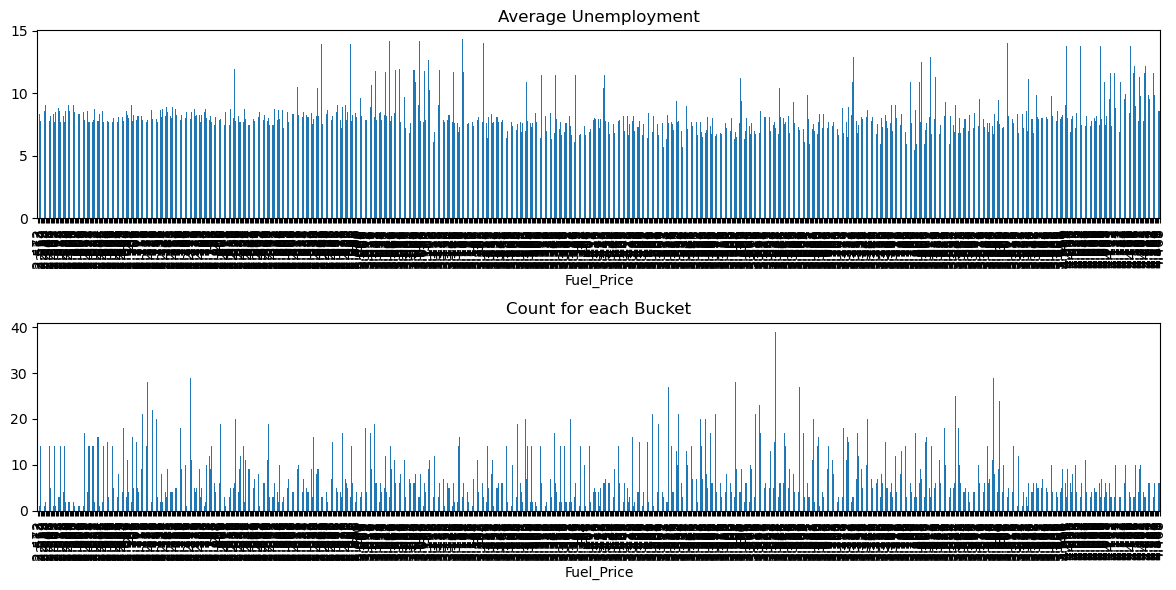

In [3]:
# Helper Function: Two Bar Chart Plots
groupby_variable = "Fuel_Price"
y_value = "Unemployment"

fig, axs = plt.subplots(2, 1, figsize=(12, 6))
walmart_data.groupby(groupby_variable)[y_value].mean().plot(kind="bar", ax=axs[0], title=f"Average {y_value}")
walmart_data.groupby(groupby_variable)[y_value].count().plot(kind="bar", ax=axs[1], title=f"Count for each Bucket")
fig.tight_layout()

<Axes: xlabel='Fuel_Price', ylabel='Unemployment'>

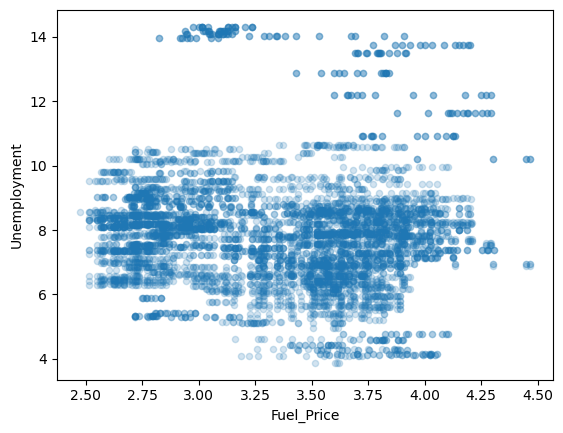

In [4]:
# Helper Function: Scatter Plot

x_value = "Fuel_Price"
y_value = "Unemployment"

walmart_data.plot(x=x_value, y=y_value, kind="scatter", alpha=0.2)

Training Data Statistics
mean_absolute_error:  467362.69989089866
mean_squared_error 313104946480.99884
R**2 0.011434370092165302

Validation Data Statistics
mean_absolute_error:  473245.9757231576
mean_squared_error 321924344661.1284
R**2 0.010418783938901943


C:\Users\defer\AppData\Local\Temp\ipykernel_17672\39300318.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f"predicted_{target}"] = model.predict(train_data[features])
C:\Users\defer\AppData\Local\Temp\ipykernel_17672\39300318.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data[f"predicted_{target}"] = model.predict(validation_data[features])


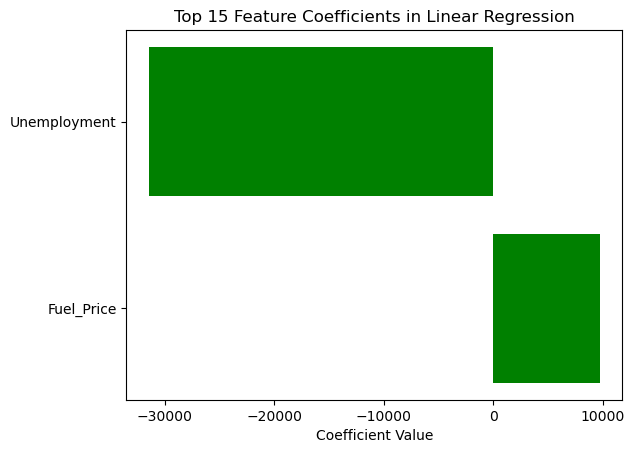

In [6]:
# Helper Function: Model Training
features = ["Fuel_Price", "Unemployment"]

target = "Weekly_Sales"  # LEAVE THIS ALONE
model_type = "linear regression"  # Options: "random forest" or "linear regression"
features_to_show = 15


if model_type == "random forest":
    model = RandomForestRegressor()
elif model_type == "linear regression":
    model = LinearRegression()

shuffled_data = walmart_data.sample(len(walmart_data))  # Shuffle our data
train_data = shuffled_data[:int(len(shuffled_data)*0.8)]
validation_data = shuffled_data[int(len(shuffled_data)*0.8):]

model.fit(train_data[features], train_data[target])

train_data[f"predicted_{target}"] = model.predict(train_data[features])
validation_data[f"predicted_{target}"] = model.predict(validation_data[features])

# How do we measure our success?
print("Training Data Statistics")
print("mean_absolute_error: ", mean_absolute_error(train_data[target], train_data[f"predicted_{target}"]))
print("mean_squared_error", mean_squared_error(train_data[target], train_data[f"predicted_{target}"]))
print("R**2", r2_score(train_data[target], train_data[f"predicted_{target}"]))
print("")

print("Validation Data Statistics")
print("mean_absolute_error: ", mean_absolute_error(validation_data[target], validation_data[f"predicted_{target}"]))
print("mean_squared_error", mean_squared_error(validation_data[target], validation_data[f"predicted_{target}"]))
print("R**2", r2_score(validation_data[target], validation_data[f"predicted_{target}"]))

if model_type == "random forest":
    importances = model.feature_importances_
    indices = np.argsort(importances)[-features_to_show:]  # sort top features

    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    # Bar plot
    ax.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.title(f'Top {features_to_show} Feature Importances')
    plt.show()

if model_type == "linear regression":
    coefficients = model.coef_
    indices = np.argsort(np.abs(coefficients))[-features_to_show:]  # sort top features by magnitude

    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    # Bar plot
    ax.barh(range(len(indices)), coefficients[indices], color='g', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Coefficient Value')
    plt.title(f'Top {features_to_show} Feature Coefficients in Linear Regression')
    plt.show()